In [76]:
from gmft.pdf_bindings import PyPDFium2Document
from gmft import CroppedTable, TableDetector

detector = TableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc

In [77]:
# tables, doc = ingest_pdf("example_report.pdf")
tables, doc = ingest_pdf("/home/snexus/Downloads/ws90.pdf")

In [78]:
type(tables[0])

gmft.table_detection.CroppedTable

In [79]:
len(doc)

15

In [80]:
type(doc)

gmft.pdf_bindings.bindings_pdfium.PyPDFium2Document

In [81]:
page = doc.get_page(5)
type(page)


gmft.pdf_bindings.bindings_pdfium.PyPDFium2Page

In [82]:
page.page_number

5

In [83]:
page_text = page.page.get_textpage()

In [84]:
print(page_text.get_text_range())

6
No Description No Description
1 Piezoelectric rain sensor array7 Battery compartment
2 Light& UV sensor, LED
indicator 8 Temperature & humiditysensor 3 USB port (factory use only )
9 fixed bolt
4 Solar Panel 10 Heating power cable
connector 5 Ultrasonic wind speed
sensor 11 Calibration button(factory use only )
6 NORTH alignment
indicator 12 Reset button Table 1: Sensor package assembly component list
3. Setup Guide
3.1 Install batteries in sensor package
Open the battery compartment with a screwdriver and
insert 2 AA batteries in the battery compartment, and
press “Reset” button, the LED indicator on the back of
the sensor package (item 4) will turn on for 3 seconds
and then flash once every 8.8 seconds indicating sensor
data transmission. If you did not pay attention, you may
have missed the initial indication. You can always press
the reset button to start over. Make sure you see the flash
once every 8.8 seconds.


In [85]:
# p1 = doc.page
# help(p1.get_positions_and_text())

In [86]:
doc

In [87]:
# for table in tables:
#     table.visualize(figsize=None)

In [88]:
from gmft import AutoTableFormatter, TATRTableFormatter

formatter = TATRTableFormatter()

In [89]:
help(formatter.extract)

Help on method extract in module gmft.table_function:

extract(table: gmft.table_detection.CroppedTable, dpi=144, padding='auto', margin=None, config_overrides=None) -> gmft.table_function.FormattedTable method of gmft.table_function.TATRTableFormatter instance
    Extract the data from the table.



In [90]:
table_index = 0
table = tables[table_index]

In [91]:
table

In [94]:
from gmft import AutoFormatConfig


config_hdr = AutoFormatConfig() # config may be passed like so
# config_hdr.verbosity = 3
# config_hdr.enable_multi_header = True
# config_hdr.semantic_spanning_cells = True # [Experimental] Merge headers
# config_hdr.large_table_threshold =0 
config_hdr.total_overlap_reject_threshold = 1.2

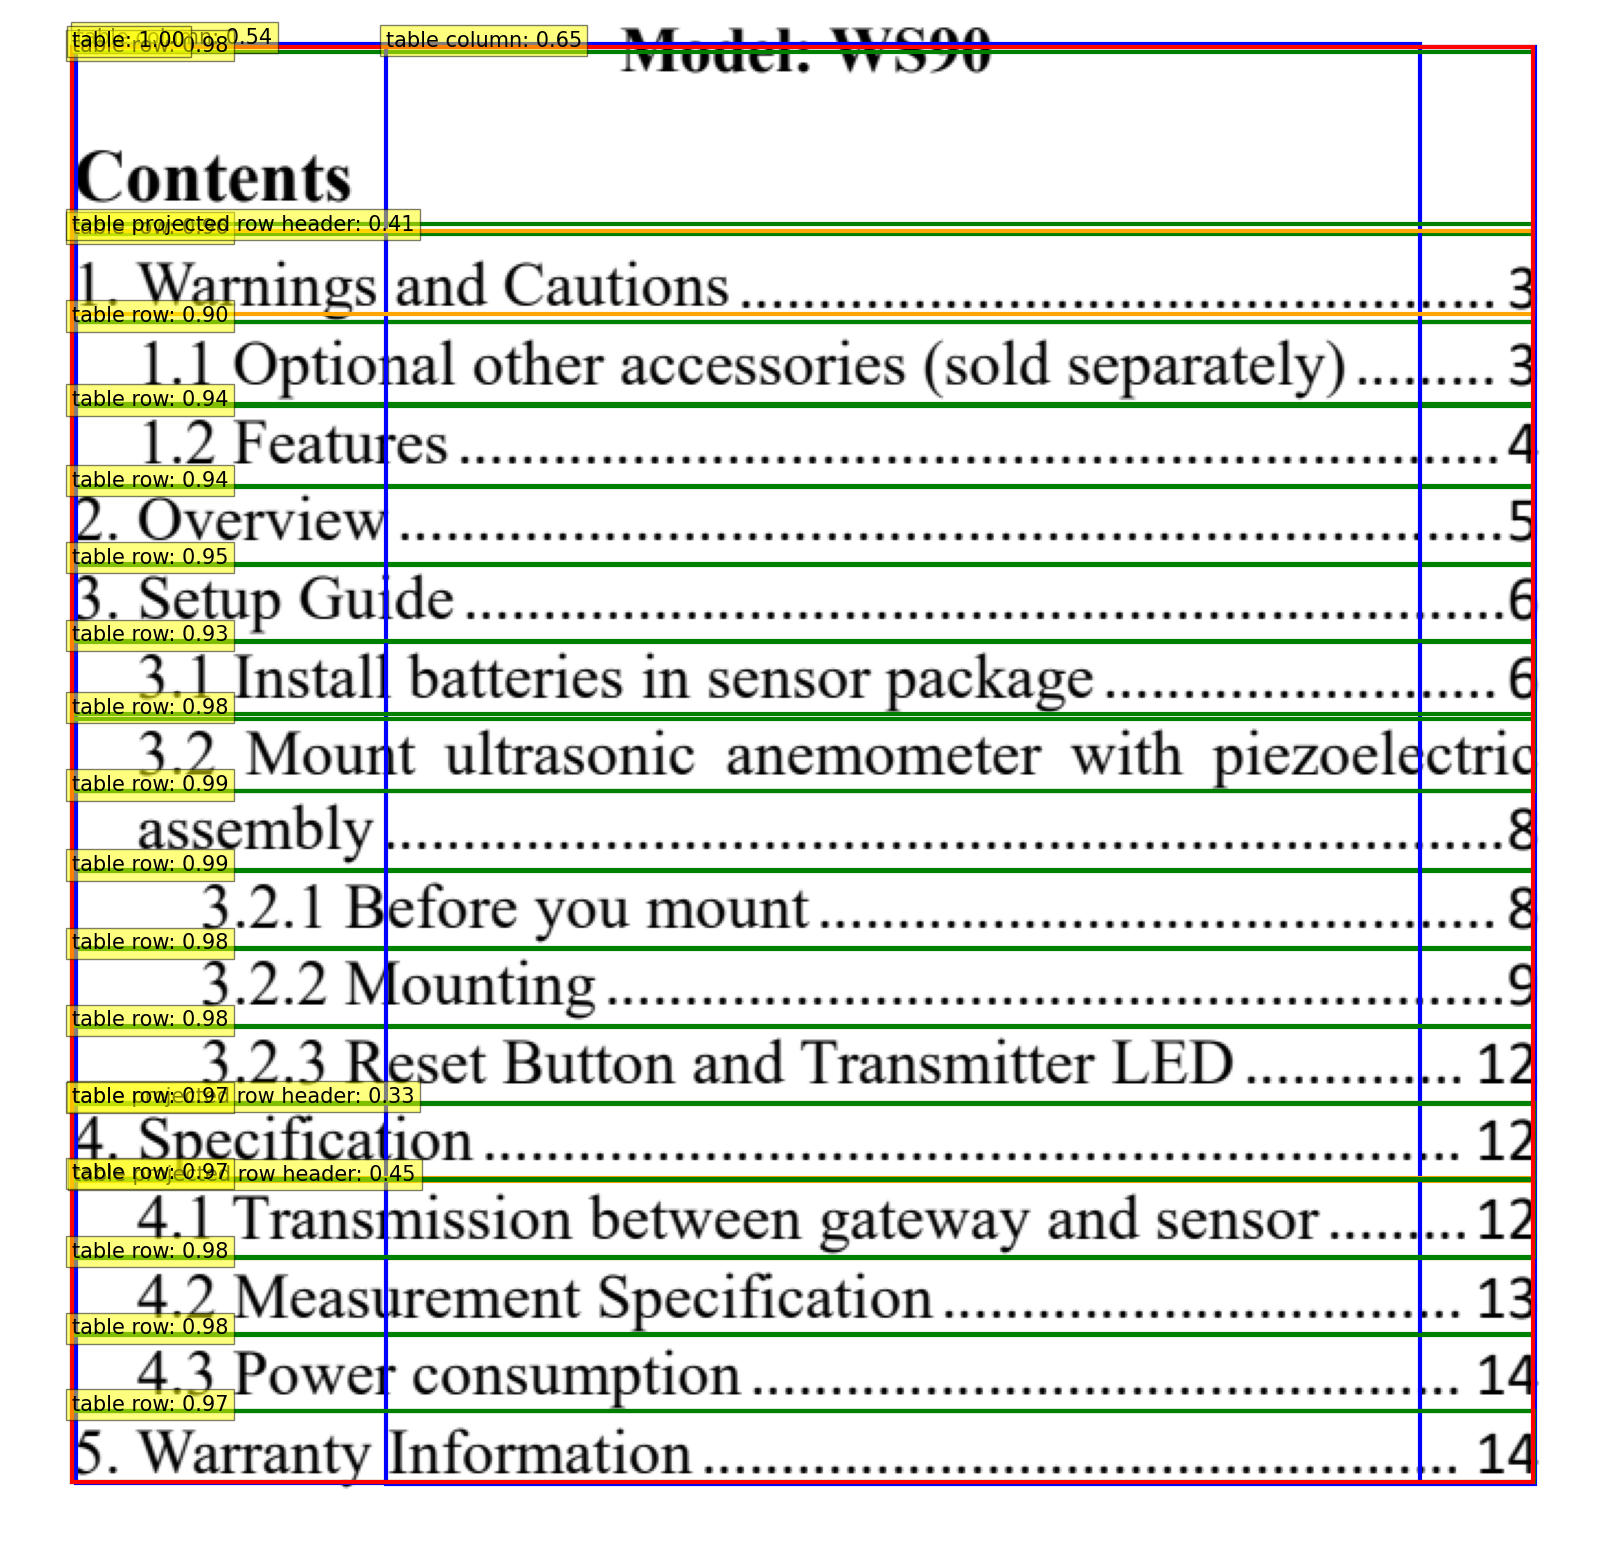

In [95]:

ft = formatter.extract(tables[table_index], dpi=200, config_overrides=config_hdr)
ft.visualize()

In [52]:
ft = formatter.extract(tables[table_index], config_overrides=config_hdr)

In [53]:
# ft.to_dict()

In [54]:
ft.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0           1 non-null      object
 1           2 non-null      object
dtypes: object(2)
memory usage: 164.0+ bytes


In [21]:
df = ft.df()

ValueError: The identified boxes have significant overlap: 98.38% of area is overlapping (Max is 20.00%)

In [34]:
import re
df.columns =  [re.sub(r"\W+","", col)+str(i) for i, col in enumerate(df.columns) ]

In [42]:
df

,0,m1,m2
0,Shop fits for new and existing stores,1.3,1.3
1,Production equipment and tooling,9.3,10.1
2,Computer equipment and software,2.1,2.9
3,Site,1.9,3.4
4,Total capital additions,14.6,17.7


In [36]:
ft.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   m1      5 non-null      object
 2   m2      5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [46]:
df.to_records()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>m1</th>\n      <th>m2</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Shop fits for new and existing stores</td>\n      <td>1.3</td>\n      <td>1.3</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Production equipment and tooling</td>\n      <td>9.3</td>\n      <td>10.1</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Computer equipment and software</td>\n      <td>2.1</td>\n      <td>2.9</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Site</td>\n      <td>1.9</td>\n      <td>3.4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Total capital additions</td>\n      <td>14.6</td>\n      <td>17.7</td>\n    </tr>\n  </tbody>\n</table>'

In [47]:
def func(row):
    xml = ['<item>']
    for field in row.index:
        xml.append('  <field name="{0}">{1}</field>'.format(field, row[field]))
    xml.append('</item>')
    return '\n'.join(xml)

In [49]:
df.apply(func, axis=1)

0    <item>\n  <field name="0">Shop fits for new an...
1    <item>\n  <field name="0">Production equipment...
2    <item>\n  <field name="0">Computer equipment a...
3    <item>\n  <field name="0">Site</field>\n  <fie...
4    <item>\n  <field name="0">Total capital additi...
dtype: object

In [48]:
print('\n'.join(df.apply(func, axis=1)))

<item>
  <field name="0">Shop fits for new and existing stores</field>
  <field name="m1">1.3</field>
  <field name="m2">1.3</field>
</item>
<item>
  <field name="0">Production equipment and tooling</field>
  <field name="m1">9.3</field>
  <field name="m2">10.1</field>
</item>
<item>
  <field name="0">Computer equipment and software</field>
  <field name="m1">2.1</field>
  <field name="m2">2.9</field>
</item>
<item>
  <field name="0">Site</field>
  <field name="m1">1.9</field>
  <field name="m2">3.4</field>
</item>
<item>
  <field name="0">Total capital additions</field>
  <field name="m1">14.6</field>
  <field name="m2">17.7</field>
</item>


In [22]:
ft.df().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0                                                 5 non-null      object
 1   Number of stores at 29 May 2022               6 non-null      object
 2   Opened                                        6 non-null      object
 3   Closed                                        6 non-null      object
 4   Number of stores at 28 May 2023               6 non-null      object
 5   Number of single staff stores at 28 May 2023  6 non-null      object
 6   Number of single staff stores at 29 May 2022  6 non-null      object
dtypes: object(7)
memory usage: 468.0+ bytes
